## 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
#### 설명
- 앞서 설명한 전처리를 통해 데이터를 변환시키고, 이를 학습시켜봅니다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
fish_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
fish_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [3]:
# 이번 장에서는 데이터를 판다스 데이터 프레임이 아닌 넘파이를 활용해서 다루어 보겠습니다.
# 앞서 설명했듯이 column_stack 함수는 각 열끼리 매칭을 시키고,
np.column_stack(([1, 2, 3], [2, 3, 4]))

array([[1, 2],
       [2, 3],
       [3, 4]])

In [4]:
# concatenate 함수는 행을 이어 값을 전달한다고 이해하시면 될거에요!
np.concatenate(([1, 2, 3], [2, 3, 4]))

array([1, 2, 3, 2, 3, 4])

In [5]:
# 왼쪽이 길이고, 오른쪽이 무게입니다!
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:3]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ]])

In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
# 훈련세트와 테스트 세트를 나눌때 sklearn에서는 train_test_split이라는 함수를 제공합니다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      random_state=42)

In [8]:
print(train_target, test_target)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.] [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
# 테스트 결과 값을 보면 1의 값이 9개, 0의 값이 3개밖에 존재하지 않는다. train_test_split함수를 아무 조건 없이 사용하면
# 다음과 같이 비슷한 비율로 분류하지 않는다.
# 이럴때, 우리는 stratify라는 매개변수를 사용한다!
# startify를 fish_target으로 두었는데, 이 말은 fish_target의 0과 1의 값의 분포를 보고 적당히 나눈다는 의미이다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      stratify=fish_target,
                                                                      random_state=42)

In [10]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
knc = KNeighborsClassifier()
knc.fit(train_input, train_target)
knc.score(test_input, test_target)

1.0

In [12]:
# 위에서 예측을 해봤더니 1.0의 점수가 나왔군요!
# 그럼 개별 데이터에 대한 예측을 해볼까요? 길이가 25, 무게가 150인 물고기는 어떤 생선으로 예측할까요?
knc.predict([[25, 150]])

array([0.])

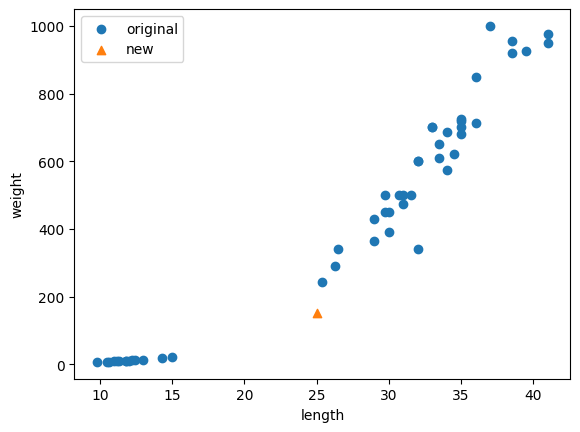

In [13]:
# 어.. 분명 도미로 예측해야하는데, 빙어라고 예측을 하는구요.
# 그래프를 그려 볼게요.
plt.scatter(fish_data[:, 0], fish_data[:, 1], label='original')
plt.scatter(25, 150, marker='^', label='new')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [14]:
# 그래프상으로 보기에는 new 생선이 도미로 예측해야하는데, 이상하군요
# 앞전에 설명했듯이 kneighbors Classifier는 어떻게 해당 값을 예측한다고 했는지 기억하시나요?
# 바로 거리를 기준으로 예측을 하는데요.
# kneighbors 함수는 해당 값과의 거리와 인덱스 값을 반환합니다.
distances, indexes = knc.kneighbors([[25, 150]])
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


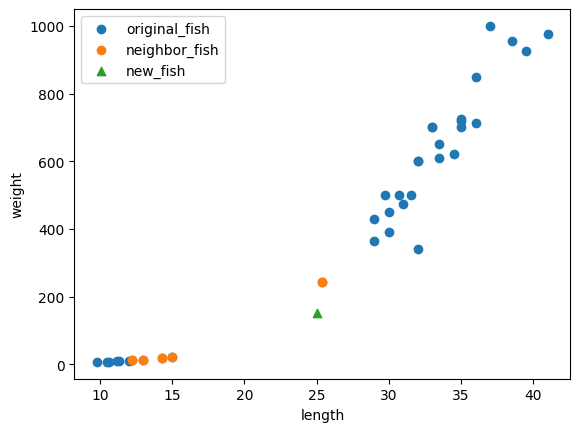

In [15]:
# 가까운 값들을 한번 그래프에서 표시해볼까요?
plt.scatter(train_input[:, 0], train_input[:, 1], label='original_fish')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], label='neighbor_fish')
plt.scatter(25, 150, marker='^', label='new_fish')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [25]:
# 아 그래프를 보니 가까운 4개의 값이 빙어이고, 1개의 값이 도미여서 해당 생선이 빙어라고 예측했군요?
# 왜 이런 현상이 발생하는 걸까요?
# 그럼 x의 값의 분포와 y의 값의 분포를 한번 볼까요?
# x의 값의 분포는 5단위네요, 10, 15, 20, 25처럼 5씩 커지고 있죠?
# y의 값의 분포를 보면 차이가 200이네요. 해당 모델은 어떤 변수에 더 큰영향을 받을까요?
# 당연히 y의 값에 영향을 많이 받겠죠 (x는 5, 10 정도 밖에 차이가 나지 않을때, y는 100, 200 차이가 나니깐요.)
# 여기서 우리가 해야할 건, 바로 전에 배웠던 정규화에 대한 이야기입니다. x와 y의 값의 스케일링이 다를때, 우리는 이 값들을 정규화 시켜야합니다.
# 가장 많이 사용하는 전처리 방법은 Standardscaler와 Maxminscaler인데 이번에는 표준 점수(z점수)로 불리는 전처리 방법을 사용해볼게요!
# 일단 평균과 표준 편차를 구해보죠.
# 여기서 axis라는 것은 행또는 열을 나타내는데 axis가 0일때는 행방향으로(세로), axis가 1일때는 열방향을(가로) 기준으로 한다고 생각하시면 됩니다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [26]:
# 앞에서 제가 설명했던 계산방법 기억하시나요?
# 정규화 데이터를 설명할 때 (원래값-평균)/표준편차라고 했습니다.
# 이번에도 해당 방식을 이용해볼게요!
train_scaled = (train_input-mean)/std

In [27]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

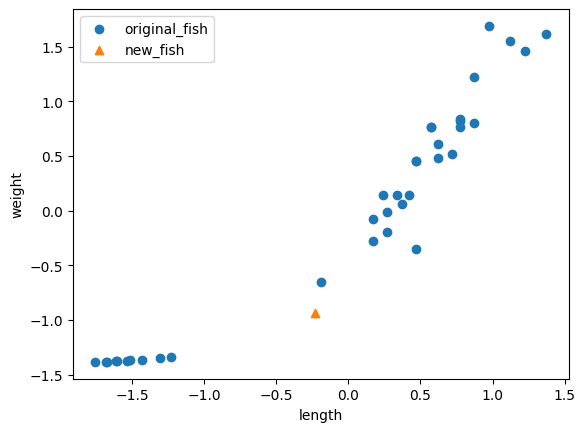

In [28]:
# 훈련 데이터도 전처리를 했으니, 새로운 생선에 대한 데이터, 테스트 데이터에 대해서도 전처리를 진행해야한다는 것 꼭 명심하세요.
new_fish = ([25, 150]-mean)/std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='original_fish')
plt.scatter(new_fish[0], new_fish[1], marker='^', label='new_fish')
plt.legend()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
# 정규화를 시켜도 원래 그래프와 똑같이 생겼다는 점, 구간이 변화했다는 것은 꼭 기억하세요!
test_scaled = (test_input-mean)/std

In [30]:
# 다시 훈련을 시켜볼까요?
knc = KNeighborsClassifier()
knc.fit(train_scaled, train_target)
knc.score(test_scaled, test_target)

1.0

In [31]:
knc.predict([new_fish])

array([1.])

In [32]:
# 오, 이번에는 제대로 예측하는거 보이시나요?
# 저번에는 4개의 빙어 데이터, 1개의 도미 데이터로 이웃을 설정했는데 이번에는 어떻게 되었을지 확인해보자구요!
distance, index = knc.kneighbors([new_fish])

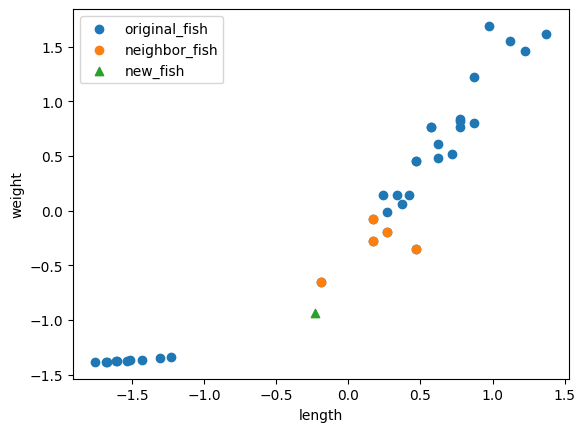

In [33]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='original_fish')
plt.scatter(train_scaled[index, 0], train_scaled[index, 1], label='neighbor_fish')
plt.scatter(new_fish[0], new_fish[1], marker='^', label='new_fish')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
# 지금까지 이해되셨나요? 모든 알고리즘이 거리를 기반으로 작동하지는 않습니다. 어떤 경우에는 정규화를 시키지 않아도
# 모델 학습이 잘 진행되는 경우가 있습니다. 하지만 정규화를 시키는 것을 선호하는 편입니다.